### Import Dataset and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [22]:
tweets = pd.read_csv("sent_score_new_en.csv")
tweets

,Unnamed: 0,Date,title,stock price fluctuations,sent_score
0,0,20210101,"[Book Village] Corporate personal ""Let's prepa...",1,1
1,1,20210102,"Suspension of Harimgak, a famous Chinese resta...",1,1
2,2,20210103,Only 9 out of 20 companies that have reduced g...,1,1
3,3,20210104,"Bernanke, ""The US economy recovers faster than...",1,1
4,4,20210105,"The government releases 180,000 tons of stockp...",0,0
...,...,...,...,...,...
360,360,20211227,"61 million won Bitcoin, 25 million won in the ...",1,1
361,361,20211228,"Ants sell Samsung Electronics 584 billion won,...",0,0
362,362,20211229,"""60% of serious accidents happen in the constr...",0,0
363,363,20211230,"Independent management of SK 'Intel NAND' ""We ...",0,0


In [23]:
tweets['title'][:5]

0    [Book Village] Corporate personal "Let's prepa...
1    Suspension of Harimgak, a famous Chinese resta...
2    Only 9 out of 20 companies that have reduced g...
3    Bernanke, "The US economy recovers faster than...
4    The government releases 180,000 tons of stockp...
Name: title, dtype: object

### Preprocessing Tweets

In [24]:
string.punctuation
remove_punc = '#$%&\'()*+,-./:;<=>@[\\]^_`{|}~'

In [25]:
sw = list(stopwords.words('english'))
sw.extend(['joebiden', 'https'])

In [26]:
remove_words = np.array(sw)

In [28]:
# import nltk
# nltk.download('punkt')
cleaned_tweets = []
l = WordNetLemmatizer()
for tweet in tweets['title']: 
    clean = []
    lst = word_tokenize(tweet)
    for word in lst: 
        word_lowercase = word.lower()
        if (word_lowercase.isdigit() or word_lowercase.isalpha() or word_lowercase=='?' or word_lowercase=='!') and (word_lowercase not in remove_words) and (word_lowercase not in remove_punc):
            clean.append(l.lemmatize(word)) 
    cleaned_tweets.append(' '.join(clean))

In [29]:
cleaned_tweets[:5]

['Book Village Corporate personal Let prepare popularity book containing investment strategy continue China 3 withdrawn New York Stock Exchange Controversy applying 25 rule fintech company comparison sale insurance passion space enthusiast could even stop Corona First private rocket countdown Resuming blocked credit loan 40 twin around world Musk rocket launch success imminent Mokdong Adele 20 sale Ioniq 5 Kia CV technology full charge electric vehicle pouring regardless age House price rise new year Bupyeong complex Sales showdown last year Kakao NC wrote new record last year better year HUG KOSPI company designated presale price management area Yangju Gyeonggi Exceeds market capitalization GDP Coffee price soaring Chemical performance forecast Lotte Chemical rising one another HMM overcoming crisis electric vehicle market strike China become tech battleground Let make stable profit improving constitution Correspondent column Skepticism spray growing US Editorial Growth export job Afr

In [30]:
tweets['cleaned_tweet'] = cleaned_tweets
cleaned_tweets[:45]

['Book Village Corporate personal Let prepare popularity book containing investment strategy continue China 3 withdrawn New York Stock Exchange Controversy applying 25 rule fintech company comparison sale insurance passion space enthusiast could even stop Corona First private rocket countdown Resuming blocked credit loan 40 twin around world Musk rocket launch success imminent Mokdong Adele 20 sale Ioniq 5 Kia CV technology full charge electric vehicle pouring regardless age House price rise new year Bupyeong complex Sales showdown last year Kakao NC wrote new record last year better year HUG KOSPI company designated presale price management area Yangju Gyeonggi Exceeds market capitalization GDP Coffee price soaring Chemical performance forecast Lotte Chemical rising one another HMM overcoming crisis electric vehicle market strike China become tech battleground Let make stable profit improving constitution Correspondent column Skepticism spray growing US Editorial Growth export job Afr

### Visualizing

### Vader Sentiment Analysis

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
negative = []
neutral = []
positive = []
compound = []
for i in range(len(cleaned_tweets)):
    result = analyzer.polarity_scores(cleaned_tweets[i])
    negative.append(result.get('neg'))
    neutral.append(result.get('neu'))
    positive.append(result.get('pos'))
    compound.append(result.get('compound'))

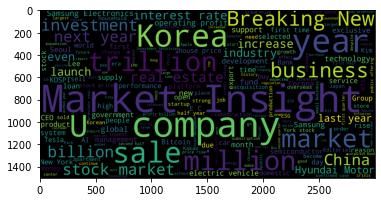

In [31]:
all_tweets = ' '.join([word for word in cleaned_tweets])
from wordcloud import WordCloud
plt.imshow(WordCloud(width = 3000, height = 1500).generate(all_tweets))
plt.show()

In [33]:
tweets['positive'] = positive
tweets.head()

,Unnamed: 0,Date,title,stock price fluctuations,sent_score,cleaned_tweet,positive
0,0,20210101,"[Book Village] Corporate personal ""Let's prepa...",1,1,Book Village Corporate personal Let prepare po...,0.122
1,1,20210102,"Suspension of Harimgak, a famous Chinese resta...",1,1,Suspension Harimgak famous Chinese restaurant ...,0.239
2,2,20210103,Only 9 out of 20 companies that have reduced g...,1,1,9 20 company reduced greenhouse gas emission K...,0.108
3,3,20210104,"Bernanke, ""The US economy recovers faster than...",1,1,Bernanke US economy recovers faster expected l...,0.181
4,4,20210105,"The government releases 180,000 tons of stockp...",0,0,government release ton stockpiled rice catch p...,0.150


In [34]:
tweets['negative'] = negative
tweets.head()

,Unnamed: 0,Date,title,stock price fluctuations,sent_score,cleaned_tweet,positive,negative
0,0,20210101,"[Book Village] Corporate personal ""Let's prepa...",1,1,Book Village Corporate personal Let prepare po...,0.122,0.082
1,1,20210102,"Suspension of Harimgak, a famous Chinese resta...",1,1,Suspension Harimgak famous Chinese restaurant ...,0.239,0.047
2,2,20210103,Only 9 out of 20 companies that have reduced g...,1,1,9 20 company reduced greenhouse gas emission K...,0.108,0.082
3,3,20210104,"Bernanke, ""The US economy recovers faster than...",1,1,Bernanke US economy recovers faster expected l...,0.181,0.054
4,4,20210105,"The government releases 180,000 tons of stockp...",0,0,government release ton stockpiled rice catch p...,0.150,0.068


In [35]:
tweets['neutral'] = neutral
tweets.head()

,Unnamed: 0,Date,title,stock price fluctuations,sent_score,cleaned_tweet,positive,negative,neutral
0,0,20210101,"[Book Village] Corporate personal ""Let's prepa...",1,1,Book Village Corporate personal Let prepare po...,0.122,0.082,0.796
1,1,20210102,"Suspension of Harimgak, a famous Chinese resta...",1,1,Suspension Harimgak famous Chinese restaurant ...,0.239,0.047,0.714
2,2,20210103,Only 9 out of 20 companies that have reduced g...,1,1,9 20 company reduced greenhouse gas emission K...,0.108,0.082,0.809
3,3,20210104,"Bernanke, ""The US economy recovers faster than...",1,1,Bernanke US economy recovers faster expected l...,0.181,0.054,0.765
4,4,20210105,"The government releases 180,000 tons of stockp...",0,0,government release ton stockpiled rice catch p...,0.150,0.068,0.782


In [36]:
tweets['compound'] = compound
tweets.head()

,Unnamed: 0,Date,title,stock price fluctuations,sent_score,cleaned_tweet,positive,negative,neutral,compound
0,0,20210101,"[Book Village] Corporate personal ""Let's prepa...",1,1,Book Village Corporate personal Let prepare po...,0.122,0.082,0.796,0.9658
1,1,20210102,"Suspension of Harimgak, a famous Chinese resta...",1,1,Suspension Harimgak famous Chinese restaurant ...,0.239,0.047,0.714,0.9779
2,2,20210103,Only 9 out of 20 companies that have reduced g...,1,1,9 20 company reduced greenhouse gas emission K...,0.108,0.082,0.809,0.9161
3,3,20210104,"Bernanke, ""The US economy recovers faster than...",1,1,Bernanke US economy recovers faster expected l...,0.181,0.054,0.765,0.9998
4,4,20210105,"The government releases 180,000 tons of stockp...",0,0,government release ton stockpiled rice catch p...,0.150,0.068,0.782,0.9994


In [37]:
sentiment = []
for num in tweets['compound']:
    if num >=0.05:
        sentiment.append('positive')
    elif num <=-0.05:
        sentiment.append('negative')
    elif -0.05 < num < 0.05:
        sentiment.append('neutral')

In [38]:
sentiment[:40]

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive']

In [39]:
tweets['sentiment'] = sentiment
tweets.head()

,Unnamed: 0,Date,title,stock price fluctuations,sent_score,cleaned_tweet,positive,negative,neutral,compound,sentiment
0,0,20210101,"[Book Village] Corporate personal ""Let's prepa...",1,1,Book Village Corporate personal Let prepare po...,0.122,0.082,0.796,0.9658,positive
1,1,20210102,"Suspension of Harimgak, a famous Chinese resta...",1,1,Suspension Harimgak famous Chinese restaurant ...,0.239,0.047,0.714,0.9779,positive
2,2,20210103,Only 9 out of 20 companies that have reduced g...,1,1,9 20 company reduced greenhouse gas emission K...,0.108,0.082,0.809,0.9161,positive
3,3,20210104,"Bernanke, ""The US economy recovers faster than...",1,1,Bernanke US economy recovers faster expected l...,0.181,0.054,0.765,0.9998,positive
4,4,20210105,"The government releases 180,000 tons of stockp...",0,0,government release ton stockpiled rice catch p...,0.150,0.068,0.782,0.9994,positive


In [40]:
tweets['sentiment'].value_counts()

positive    350
negative     15
Name: sentiment, dtype: int64

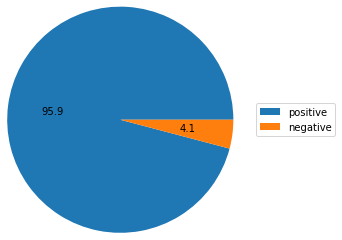

In [41]:
plt.pie(tweets['sentiment'].value_counts(), radius=1.3, autopct='%0.1f')
plt.legend(labels=tweets.sentiment.unique(), bbox_to_anchor=(1.1, 0.5), loc="center left")
plt.show()

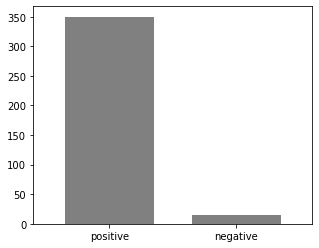

In [42]:
tweets['sentiment'].value_counts().plot(kind='bar', color='grey', width=0.7, figsize=(5, 4))
plt.xticks(rotation=360)
plt.show()

### Conclusion and Findings

The sentiment of tweets is mostly neutral. However, there are slightly more tweets with positive sentiment than negative sentiment. The main purpose of this project was to preprocess and clean tweets using lemmatizer, visualize using WordCloud, and use the Vader Sentiment Analyzer. 